## Projeto Final

Dada uma base de dados que contem resultados de diversos jogos de Counter Strike, com variáveis coletadas nos jogos e os resultados de quem ganhou cada round. Vamos criar um modelo que nos permita prever quem irá ganhar um round de um jogo

## Importando as Bibliotecas

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importando o Dataset

In [126]:
df = pd.read_csv('csgo_round_snapshots.csv')

## Estudando o Dataset

In [127]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


Aparentemente não temos colunas NaN no dataset

Temos 122.410 linhas no dataset e 94 colunas de variáveis numéricas

## Verificando se temos dados nulos

In [128]:
df_nan = pd.DataFrame(df.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'coluna'})

In [129]:
df_nan

,coluna,total_nan
0,time_left,0
1,ct_score,0
2,t_score,0
3,map,0
4,bomb_planted,0
...,...,...
92,ct_grenade_molotovgrenade,0
93,t_grenade_molotovgrenade,0
94,ct_grenade_decoygrenade,0
95,t_grenade_decoygrenade,0


In [130]:
df_nan[df_nan.total_nan > 0]

,coluna,total_nan


## Estudando as variáveis categóricas

In [131]:
cols = df.dtypes.reset_index().rename(columns={'index':  'nome', 0: 'tipo'})
cols_categ = cols[cols['tipo'] == 'object']
count_cols = cols[cols['tipo'] != 'object']
cols_categ

,nome,tipo
3,map,object
96,round_winner,object


In [132]:
count_cols # não é interessante ter valor booleano, então vamos transformá-lo em int

,nome,tipo
0,time_left,float64
1,ct_score,float64
2,t_score,float64
4,bomb_planted,bool
5,ct_health,float64
...,...,...
91,t_grenade_incendiarygrenade,float64
92,ct_grenade_molotovgrenade,float64
93,t_grenade_molotovgrenade,float64
94,ct_grenade_decoygrenade,float64


In [133]:
count_cols[count_cols.tipo == bool]

,nome,tipo
4,bomb_planted,bool


In [134]:
df.bomb_planted	= df.bomb_planted.astype(int)

In [135]:
df.bomb_planted

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 122410, dtype: int32

In [136]:
# Explorando os valores das colunas categóricas

df.round_winner.unique()


array(['CT', 'T'], dtype=object)

Temos 2 colunas categóricas no dataset, o mapa que estava sendo jogado, e o resultado de quem ganhou

In [137]:
cols_categ

,nome,tipo
3,map,object
96,round_winner,object


A coluna round winner mostra quem ganhou o jogo, CT representando Counter Terrorists e T representando Terrorists, que são os dois times jogados no jogo

## Verificando outliers nas variáveis contínuas

In [138]:
count_cols

,nome,tipo
0,time_left,float64
1,ct_score,float64
2,t_score,float64
4,bomb_planted,bool
5,ct_health,float64
...,...,...
91,t_grenade_incendiarygrenade,float64
92,ct_grenade_molotovgrenade,float64
93,t_grenade_molotovgrenade,float64
94,ct_grenade_decoygrenade,float64


In [139]:
nomes_colunas = []
qnt_outliers = []


for i in count_cols.nome:

    contador = 0
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1 
    li = q1 - 1.5 *(q3-q1)
    ls = q3 + 1.5 *(q3-q1)
    for j in df.index:
        if li <= df[i][j] <= ls:
            pass
        else:
            contador+=1
    
    perc_outliers = (contador / df[i].count()) *100
    nomes_colunas.append(i)
    qnt_outliers.append(perc_outliers)

             
      

In [140]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


## Tratando variáveis categóricas

In [141]:
outliers = pd.DataFrame()


In [142]:
outliers['nomes_colunas'] = nomes_colunas
outliers['perc_outliers'] = qnt_outliers
outliers

,nomes_colunas,perc_outliers
0,time_left,0.000000
1,ct_score,0.492607
2,t_score,0.482804
3,bomb_planted,11.178825
4,ct_health,6.602402
...,...,...
90,t_grenade_incendiarygrenade,1.921412
91,ct_grenade_molotovgrenade,4.506985
92,t_grenade_molotovgrenade,0.000000
93,ct_grenade_decoygrenade,2.681154


## Como ficaram após tratamento as opções da variável Resposta

CT = 0 e T = 1

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols_categ.nome:
    df[str(i) + '_encoded'] = le.fit_transform(df[i].values)
    


## Separando o Dataset entre Treino e Teste

In [144]:
df[['round_winner', 'round_winner_encoded']]

,round_winner,round_winner_encoded
0,CT,0
1,CT,0
2,CT,0
3,CT,0
4,CT,0
...,...,...
122405,T,1
122406,T,1
122407,T,1
122408,T,1


### Padronizando as variáveis de entrada do modelo

In [145]:
df 

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,map_encoded,round_winner_encoded
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,1,0
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,1,0
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,1,0
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,1,0
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,1,200.0,242.0,195.0,359.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,6,1
122406,174.93,11.0,15.0,de_train,0,500.0,500.0,95.0,175.0,11500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,6,1
122407,114.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,6,1
122408,94.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,6,1


In [146]:
df = df.drop(['round_winner', 'map'], axis=1)

In [147]:
df

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_encoded,round_winner_encoded
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,1,200.0,242.0,195.0,359.0,100.0,5950.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1
122406,174.93,11.0,15.0,0,500.0,500.0,95.0,175.0,11500.0,23900.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1
122407,114.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,6,1
122408,94.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,6,1


In [148]:
from sklearn.model_selection import train_test_split

x= df.drop('round_winner_encoded', axis=1)
y = df.round_winner_encoded

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size= 0.3, random_state=42)

### Quebrando o Dataframe

In [149]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)
y_predict = modelo.predict(x_teste)

C:\Users\Suzan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Importando o modelo

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

print('Acurácia foi de:',  accuracy_score(y_teste, y_predict))

print('O score do modelo foi de:',  f1_score(y_teste, y_predict))

cm = confusion_matrix(y_teste, y_predict)

Acurácia foi de: 0.7355335893037062
O score do modelo foi de: 0.747596028899631


In [151]:
cm

array([[12628,  5426],
       [ 4286, 14383]], dtype=int64)

## Avaliando o Modelo

<Axes: >

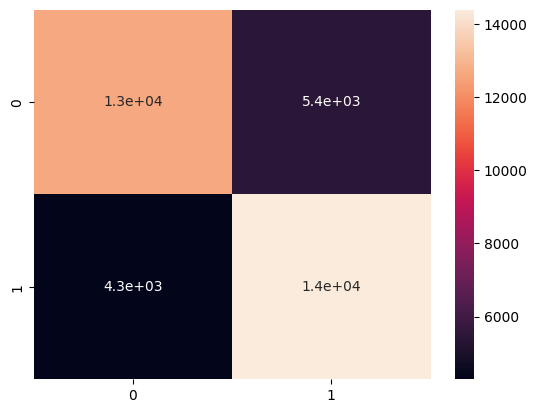

In [152]:
import seaborn as sns

sns.heatmap(data=cm, annot=True)